![title](https://www.incimages.com/uploaded_files/image/1920x1080/getty_539884497_2000133320009280223_219746.jpg)

# Analysis of Profanity in Hip Hop

Carlos Fernandez


Andrey Knyazev 

Markus Ferrell

## Introduction

#### \**Please note. Though we censored the words in the dataset along with our prose, the primary focus of this project is explicit language.\**

It is truly a feat how much hip hop has changed since the early days of DJ Kool Herc and MC Coke La Rock laying the foundations for what would become one of the most popular music genre's in the world. A common theme that could be found in today's hip hip scene would be varying degrees of profanity. Anything from the N-word to the F-bomb could likely be heard at least once in your average billboard entry. Ultimately, we wanted to what kind of relationships we can unravel with this profanity dataset using different processing methods within the realm of data science.


With the help of data science, we will examine the prevalence of profanity in popular hip hop over a span of time. In this case, the most 5 most popular albums for each year from 1985 to 2018 will be analyzed. These albums in the dataset were chosen based on total sales and artist popularity.

There are concerns regarding the effects of an increase in profanity in popular
hip-hop/rap songs, particularly pertaining to youth. Adults for the most part are unaffected by an
increase or decrease in profanity in popular rap music, however youth that are susceptible to
being easily influenced by these lyrics. Youth are very impressionable, and when popular music
contains frequent profanity that depicts violence, racism, homophobia or sexism has been
shown to have a correlation with teens and risky behaviors as a result of them being fans of the
hip-hop/rap genre. This is mostly prevalent in sexual health and behavior, as well as alcohol and
drug usage.

Here is an npr article referencing how rap music is linked to alcohol and violence:
https://www.npr.org/templates/story/story.php?storyId=5390075

We also have a study where 500 college students are exposed to violent music and then
perform word-association tasks and their subsequent conclusion of an existing correlation and
causation:

https://www.apa.org/monitor/julaug03/violent

Our analysis shows this increase in profanity in popular hip-hop/rap music has been a
steady trend over the past 33 years and this upward trend is likely to continue in coming years.
In conjunction with two of many studies, we establish the effect of popular rap music and the
amount of profanity it contains on the impressionable demographic of a population, particularly
the youth. This can develop into a potential issue within a society, and our data supports these
conclusions. As you read through our analysis of the usage of profanity in popular hip-hop/rap
music, please keep these trends and correlations in mind and consider the potential effects they
may have.

## Data Collection

The following Python libraries were used to explore, manipulate and analyze the profanity dataset: 


In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from ggplot import *
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')


Now we will load the .csv (comma-separated value) file which will produce the Pandas DataFrame with the hip hop profanity data:

In [32]:
hiphop_df = pd.read_csv('Profanity in Hip Hop.csv')
hiphop_df.head()

,Year,Album,Artist - Album,Artist - Song,Artist,Song,Song & Featuring,Swear word in Title?,Swear Word,Times Used,Released as a Single?,Single - Highest US Charting Position,Spotify URI
0,1985,Radio,LL Cool J - Radio,LL Cool J - That's A Lie,LL Cool J,That's A Lie,That's A Lie,N,Fuck,NaN,N,NaN,https://embed.spotify.com/track/3iZFCLtKzcpiG9...
1,1985,Radio,LL Cool J - Radio,LL Cool J - That's A Lie,LL Cool J,That's A Lie,That's A Lie,N,Shit,NaN,N,NaN,https://embed.spotify.com/track/3iZFCLtKzcpiG9...
2,1985,Radio,LL Cool J - Radio,LL Cool J - That's A Lie,LL Cool J,That's A Lie,That's A Lie,N,Bitch,2.0,N,NaN,https://embed.spotify.com/track/3iZFCLtKzcpiG9...
3,1985,Radio,LL Cool J - Radio,LL Cool J - That's A Lie,LL Cool J,That's A Lie,That's A Lie,N,Pussy,NaN,N,NaN,https://embed.spotify.com/track/3iZFCLtKzcpiG9...
4,1985,Radio,LL Cool J - Radio,LL Cool J - That's A Lie,LL Cool J,That's A Lie,That's A Lie,N,Hoe,NaN,N,NaN,https://embed.spotify.com/track/3iZFCLtKzcpiG9...


The Pandas DataFrame above displays the profanity information for every single album that was selected for this study. The 'Swear Word' column is what we are all here for. Each album and their respective tracks were examined for the occurrences of 11 common profanity words.

The selected profanity words comprise of:

1. F**k
2. S**t
3. B***h
4. P***y 
5. H*e
6. N-Word
7. D**k
8. C**k
9. D**k
10. T**s
11. A*s

## Tidying the Data

Before we actually process this data and make some exploratory analyses, we will brush up the data.

First, we would like to censor the swear words in the 'Swear Word' column of our Pandas DataFrame. Even though examining the prevalence of profanity words in Hip Hop is a unique and interesting topic, it is unnecessary and perhaps even distracting to leave the profanity words uncensored, especially when curating our message covering insights learned in this tutorial. 

In [33]:
for index, row in hiphop_df.iterrows():
    if row['Swear Word'] == 'Fuck':
        hiphop_df.at[index, 'Swear Word'] = 'F**k'
    elif row['Swear Word'] == 'Shit':
        hiphop_df.at[index, 'Swear Word'] = 'S**t'
    elif row['Swear Word'] == 'Bitch':
        hiphop_df.at[index, 'Swear Word'] = 'B**h'
    elif row['Swear Word'] == 'Pussy':
        hiphop_df.at[index, 'Swear Word'] = 'P***y'     
    elif row['Swear Word'] == 'Dick':
        hiphop_df.at[index, 'Swear Word'] = 'D**k'
    elif row['Swear Word'] == 'Cock':
        hiphop_df.at[index, 'Swear Word'] = 'C**k'
    elif row['Swear Word'] == 'Tits':
        hiphop_df.at[index, 'Swear Word'] = 'T**s'

        
hiphop_df.head()

,Year,Album,Artist - Album,Artist - Song,Artist,Song,Song & Featuring,Swear word in Title?,Swear Word,Times Used,Released as a Single?,Single - Highest US Charting Position,Spotify URI
0,1985,Radio,LL Cool J - Radio,LL Cool J - That's A Lie,LL Cool J,That's A Lie,That's A Lie,N,F**k,NaN,N,NaN,https://embed.spotify.com/track/3iZFCLtKzcpiG9...
1,1985,Radio,LL Cool J - Radio,LL Cool J - That's A Lie,LL Cool J,That's A Lie,That's A Lie,N,S**t,NaN,N,NaN,https://embed.spotify.com/track/3iZFCLtKzcpiG9...
2,1985,Radio,LL Cool J - Radio,LL Cool J - That's A Lie,LL Cool J,That's A Lie,That's A Lie,N,B**h,2.0,N,NaN,https://embed.spotify.com/track/3iZFCLtKzcpiG9...
3,1985,Radio,LL Cool J - Radio,LL Cool J - That's A Lie,LL Cool J,That's A Lie,That's A Lie,N,P***y,NaN,N,NaN,https://embed.spotify.com/track/3iZFCLtKzcpiG9...
4,1985,Radio,LL Cool J - Radio,LL Cool J - That's A Lie,LL Cool J,That's A Lie,That's A Lie,N,Hoe,NaN,N,NaN,https://embed.spotify.com/track/3iZFCLtKzcpiG9...


Now this DataFrame has the most profane words censored in its 'Swear Words' column. Furthermore, the DataFrame itself has a few columns that contain repetitive information on the artists. 

The following code will alter the order of the DataFrame columns along with dropping unnecessary columns. 

In [34]:
hiphop_df = hiphop_df.drop(columns=['Artist - Album', 'Artist - Song', 'Spotify URI'])
hiphop_df = hiphop_df[['Year','Artist', 'Song & Featuring', 'Album', 'Song', 'Swear word in Title?', 'Swear Word', 'Times Used', 'Released as a Single?', 'Single - Highest US Charting Position']]
hiphop_df.tail(35)

,Year,Artist,Song & Featuring,Album,Song,Swear word in Title?,Swear Word,Times Used,Released as a Single?,Single - Highest US Charting Position
29142,2018,Lil' Wayne,Dope New Gospel (featuring Nivea),Tha Carter V,Dope New Gospel,N,T**s,NaN,N,NaN
29143,2018,Lil' Wayne,Dope New Gospel (featuring Nivea),Tha Carter V,Dope New Gospel,N,Ass,NaN,N,NaN
29144,2018,Lil' Wayne,Perfect Strangers,Tha Carter V,Perfect Strangers,N,F**k,15.0,N,NaN
29145,2018,Lil' Wayne,Perfect Strangers,Tha Carter V,Perfect Strangers,N,S**t,4.0,N,NaN
29146,2018,Lil' Wayne,Perfect Strangers,Tha Carter V,Perfect Strangers,N,B**h,3.0,N,NaN
29147,2018,Lil' Wayne,Perfect Strangers,Tha Carter V,Perfect Strangers,N,P***y,NaN,N,NaN
29148,2018,Lil' Wayne,Perfect Strangers,Tha Carter V,Perfect Strangers,N,Hoe,NaN,N,NaN
29149,2018,Lil' Wayne,Perfect Strangers,Tha Carter V,Perfect Strangers,N,N-Word,NaN,N,NaN
29150,2018,Lil' Wayne,Perfect Strangers,Tha Carter V,Perfect Strangers,N,D**k,NaN,N,NaN
29151,2018,Lil' Wayne,Perfect Strangers,Tha Carter V,Perfect Strangers,N,C**k,NaN,N,NaN


For data processing purposes, we will change the NaN value in the 'Times Used' Column to the floating-point value 0.0.

For the last step in the tidying process, we want to isolate the featured artist(s) from all of the entries in the 'Song & Featuring' column because we do not need the song title included when we already have a column for it. 

This will include extracting the string from each 'Song & Featuring', removing the song name itself, and wrapping it up by renaming the column to reflect the newly tidied DataFrame.



The following code utilizes some RegEx functions to search a string for a match.

In [35]:
for index, row in hiphop_df.iterrows():
    
    if (math.isnan(row['Times Used'])):
        hiphop_df.at[index, 'Times Used'] = 0.0
    
    match = re.search("\(featuring.+\)", row['Song & Featuring']) 
    if (match):
        hiphop_df.at[index, 'Song & Featuring'] = match.group()[10:-1]
    else:
        hiphop_df.at[index, 'Song & Featuring'] = '-'
        

hiphop_df = hiphop_df.rename(columns = {'Song & Featuring': 'Featuring Artist'})


        

       

                                                      

In [36]:
hiphop_df[29142:29147]

,Year,Artist,Featuring Artist,Album,Song,Swear word in Title?,Swear Word,Times Used,Released as a Single?,Single - Highest US Charting Position
29142,2018,Lil' Wayne,Nivea,Tha Carter V,Dope New Gospel,N,T**s,0.0,N,NaN
29143,2018,Lil' Wayne,Nivea,Tha Carter V,Dope New Gospel,N,Ass,0.0,N,NaN
29144,2018,Lil' Wayne,-,Tha Carter V,Perfect Strangers,N,F**k,15.0,N,NaN
29145,2018,Lil' Wayne,-,Tha Carter V,Perfect Strangers,N,S**t,4.0,N,NaN
29146,2018,Lil' Wayne,-,Tha Carter V,Perfect Strangers,N,B**h,3.0,N,NaN


<br></br><br></br>

## Exploratory Data Analysis / Data Visualization

<br></br><br></br><br></br>
#### Profanity Over Time 

We will begin with the most obvious possible trend out of the data. This has been mentioned over and over in media and in different social circles. This would be the trend of rap becomming more vulgar over time. To do this, we are plotting the usage of swear words over time.

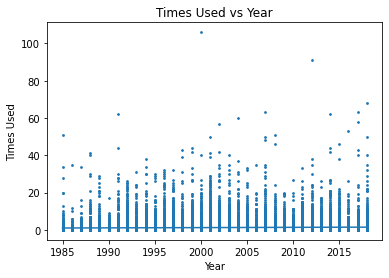

In [37]:
# simply analyzing it as swear usage over time with labels to help distinguish the words used

plt.scatter(hiphop_df['Year'], hiphop_df['Times Used'], s = 3)

X = hiphop_df['Year'].values.reshape(-1,1)
Y = hiphop_df['Times Used'].replace(np.nan, 0)
#making the model
reg = linear_model.LinearRegression()
reg.fit(X,Y)
    
#creating the line based on the model and plotting
prediction = reg.predict(X)
plt.plot(X, prediction, label = 'Linear Regression')



plt.title('Times Used vs Year')
plt.ylabel('Times Used')
plt.xlabel('Year')
plt.show()

Thinking about this code though, it does not really answer the question that we are searching for. Instead, we should make a graph about the number of swears in any particular rap song per year. In this way, we can lump all of the swears into one profanity category. Doing so will allow us to see if songs are getting more profane over time. This is a far more understandable piece of data. <br></br><br></br><br></br>



In [38]:
groups = hiphop_df.groupby(['Artist', 'Song'])

# creating a dataframe which has the sum of all of the swears rather than the individual swear's sums
songs_df = pd.DataFrame()
for group_name, group in groups:
    row = group.iloc[0]
    songs_df = songs_df.append({'Artist': row['Artist'],'Song': row['Song'] ,'Year': row['Year'],'SongSum': np.sum(group['Times Used']), 'Single - Highest US Charting Position': row['Single - Highest US Charting Position']}, ignore_index = True)
    
songs_df.head()

,Artist,Single - Highest US Charting Position,Song,SongSum,Year
0,2 Live Crew,NaN,2 live is what we are,0.0,1986.0
1,2 Live Crew,NaN,Beat Box,0.0,1986.0
2,2 Live Crew,NaN,Check it out yall,3.0,1986.0
3,2 Live Crew,NaN,Get it girl,6.0,1986.0
4,2 Live Crew,NaN,Throw the D,2.0,1986.0


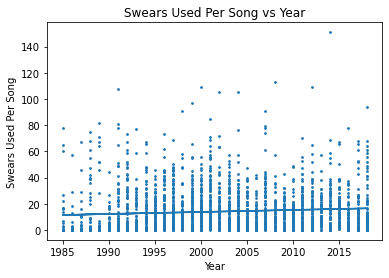

In [39]:
plt.scatter(songs_df['Year'], songs_df['SongSum'], s = 3)

X = songs_df['Year'].values.reshape(-1,1)
Y = songs_df['SongSum'].replace(np.nan, 0)
#making the model
reg = linear_model.LinearRegression()
reg.fit(X,Y)
    
#creating the line based on the model and plotting
prediction = reg.predict(X)
plt.plot(X, prediction, label = 'Linear Regression')


plt.title('Swears Used Per Song vs Year')
plt.ylabel('Swears Used Per Song')
plt.xlabel('Year')
plt.show()

In creating this graph, we see that the trend is far more apparent. The average number of curse words is relatively high per song and it has been increasing gradually over time.

This graph makes the assumption that every swear is weighted the same. This might not be the case for listeners however. For example, listeners may think that the F-word or the N-word are far more profane than the A-word. In order to better understand the data and the trends of rap profanity over time, we must break these individual words apart. That is what we will do with the following code.

Slopes for each swear's regression line
Ass :  [-0.00203577]
B**h :  [0.02823465]
C**k :  [-0.00366475]
D**k :  [-0.00834247]
Damn :  [0.0066386]
F**k :  [0.00637335]
Hoe :  [0.0033162]
N-Word :  [0.0923218]
P***y :  [0.00461364]
S**t :  [0.02496093]
T**s :  [0.00106233]


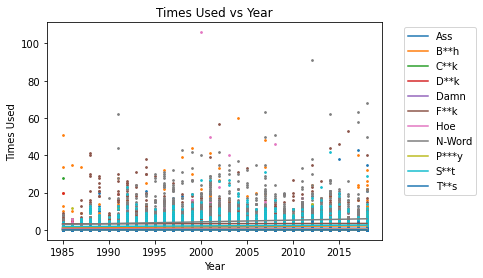

In [40]:
swear_groups = hiphop_df.groupby('Swear Word')
label = []

print('Slopes for each swear\'s regression line')


for swear, group in swear_groups:
    label.append(swear)
    plt.scatter(group['Year'], group['Times Used'], s = 3)
    
    X = group['Year'].values.reshape(-1,1)
    Y = group['Times Used'].replace(np.nan, 0)
    #making the model
    reg = linear_model.LinearRegression()
    reg.fit(X,Y)
    
    #creating the line based on the model and plotting
    prediction = reg.predict(X)
    plt.plot(X, prediction, label = 'Linear Regression')
    print(swear, ": ", reg.coef_)
    
    
        
plt.legend(label, bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.title('Times Used vs Year')
plt.ylabel('Times Used')
plt.xlabel('Year')
plt.show()

As we can see, the trends of individual words are radically different. Words like the B-word, S-word, and N-word are all increasing in usage at far higher rates than other words. In contrast, words such as the A-word, C-word, and D-word are gradually decreasing in usage.

Another important note of this data is the position of the regression lines. We can see that the regression lines are close to the bottom of the graph which means there is a noteable number of 0's for each word that are dragging it down. Perhaps, another way to analyze this dataset is to check if cleanliness is decreasing rather than if vulgarity is increasing.

To do so, we will first look and see the number of songs that have no vulgarity in them over time.

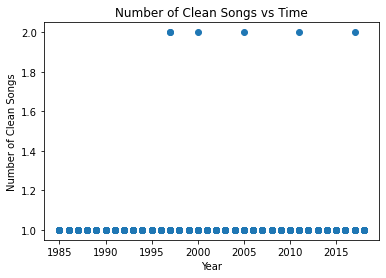

In [41]:
groups = songs_df.groupby(['Year', 'Song'])

years = np.array([])
sums = []

for group_name, groups in groups:
    
    years = np.append(years, group_name[0])
    sums.append(len(groups.index))
    
    

plt.scatter(years, sums)
plt.xlabel("Year")
plt.ylabel("Number of Clean Songs")
plt.title("Number of Clean Songs vs Time")
plt.show()


A little unsurprisingly, there were little to no completely clean songs throughout the entire dataset that we had. Out of the whole dataset, we have 10 songs that are completely clean. We must take a different approach to assessing cleanliness.

The way we will assess cleanliness now is to take the number of swear word categories that have nothing in them and divide them by the number of overall swear word categories for that year. This will give us the ratio of cleanliness of the songs. For example, if the song does not contain 8 out of the 11 curse words, it will be 8/11 clean.

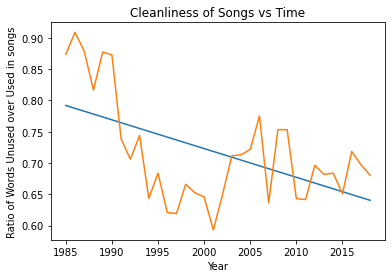

Slope [-0.00459576]


In [42]:
hiphop_df1 = pd.read_csv('Profanity in Hip Hop.csv')

culled_df = hiphop_df1.dropna(subset=['Times Used'])
zeros_df = pd.concat([hiphop_df1, culled_df]).drop_duplicates(keep = False)

years = np.array([])
sums = []
groups = zeros_df.groupby(['Year'])
for group_name, groups in groups:
        
    years = np.append(years, group_name)
    sums.append(len(groups.index)/len(hiphop_df.loc[hiphop_df['Year'] == group_name]))
    

    

    
X = years.reshape(-1,1)
Y = sums
#making the model
reg = linear_model.LinearRegression()
reg.fit(X, Y)
    
#creating the line based on the model and plotting
prediction = reg.predict(X)
plt.plot(X, prediction, label = 'Linear Regression')

plt.plot(years, sums)
plt.xlabel("Year")
plt.ylabel("Ratio of Words Unused over Used in songs")
plt.title("Cleanliness of Songs vs Time")
plt.show()

print("Slope", reg.coef_)

My making this standard, we see that originally, rap music was largely clean and did not use many different profane words. As time progresses though, the ratio of cleanliness decreases. It reached a low around 2001 and then came back up to a steady point a few years later. The decrease that we see from our linear regression is a slope of -0.4% each year in cleanliness. Though this doesn't seem like a lot, over many years it has a clear effect on the genre.

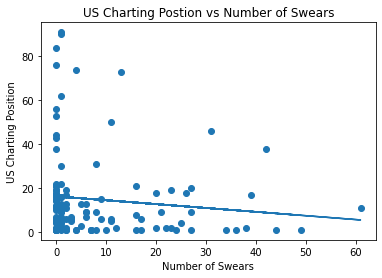

Slope:  [-0.1759371]


In [43]:
billboard_df = songs_df.dropna(subset = ['Single - Highest US Charting Position'])


X = billboard_df['SongSum'].values.reshape(-1,1)
Y = billboard_df['Single - Highest US Charting Position']
#making the model
reg = linear_model.LinearRegression()
reg.fit(X, Y)
    
#creating the line based on the model and plotting
prediction = reg.predict(X)
plt.plot(X, prediction, label = 'Linear Regression')


plt.scatter(billboard_df['SongSum'], billboard_df['Single - Highest US Charting Position'])
plt.xlabel('Number of Swears')
plt.ylabel('US Charting Position')
plt.title('US Charting Postion vs Number of Swears')
plt.show()
print('Slope: ', reg.coef_)

By applying regression, we are able to find that the trend has a slope of -0.176. This means that as the number of swears increases, the US charting position goes down. This is important because number 1 in US Charting position is ideal. In other words, the trend is pointing out that the increase in number of swear words leads to a better US charting position.

Based on the above data and the trend that was captured, we will apply machine learning to dig deeper into the trend and see if it is possible to predict a song being popular by the swears that it uses. <br></br><br></br><br></br>

<br></br><br></br><br></br><br></br>

* Now we will produce a plot that contains the average amount of profanity per year in hip hop. 

(1984.0, 2019.0)

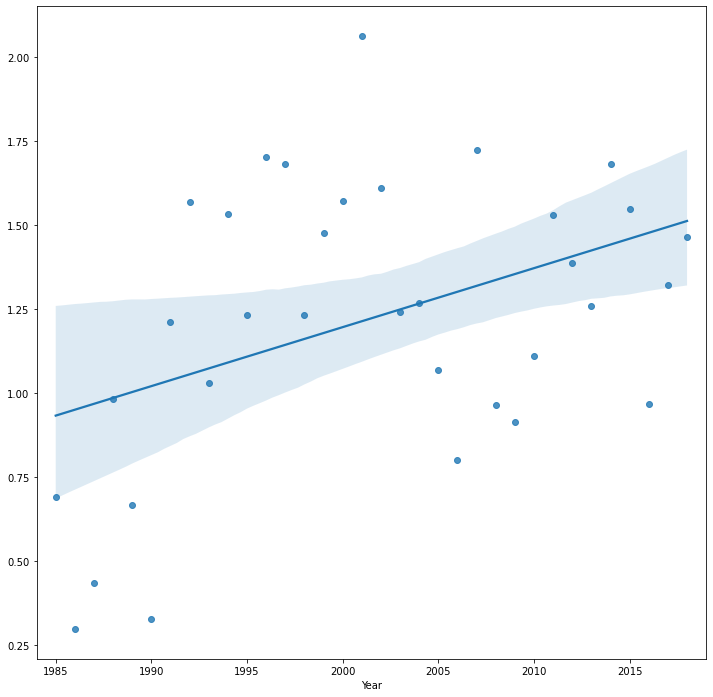

In [44]:
plt.figure(figsize = (12, 12))

avg_words = hiphop_df['Times Used'].groupby(hiphop_df['Year']).mean()
sns.regplot(x = avg_words.index, y = avg_words.values, data = avg_words)

plt.xlim(1984, 2019)

The first noticeable difference from the previous gaph is that the trend is not as apparent. It almost appears as if this data may misrepresentative; however, this is because the distribution of the data across each year. Outliers, such as a particular album not having little to no profanity could greatly affect overal plot distribution. In order to better interpret the average swear words per song rather than an ambigous scatter plot, we implement a linear regression model on the data. This allows us to model the relationship between two variables by fitting a linear equation to observed data. 

As a result, a clear relationship can be seen between the increase in average swear words per song over time. 

<br></br>
<br></br><br></br>



* The following plot displays the amount of curse words per year (up to 25)

Text(0, 0.5, 'Year')

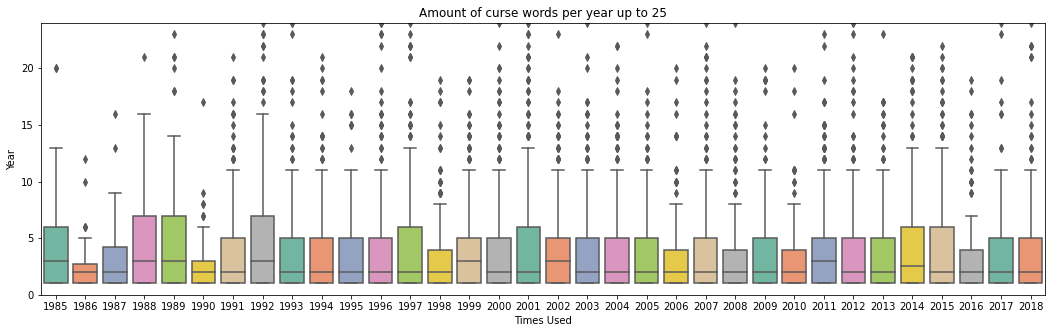

In [45]:
plist = pd.read_csv('Profanity in hip Hop.csv')
#Boxplot showing amount of curse words as time progresses

plt.figure(figsize = (18, 5))
sns.boxplot(x = 'Year', y = 'Times Used', data = plist, palette = "Set2")

axes = plt.gca()
plt.ylim(0,24)

plt.title("Amount of curse words per year up to 25")
plt.xlabel("Times Used")
plt.ylabel("Year")


# Machine Learning

Based on the above data and trends, we are curious if we can build a model to predict a song's popularity based on the number of swears that it uses. With this model, we can assess them to build predictions on the overall rap scene.

In order to get a machine learning model to work with the data, we must make some changes to the data.

Firstly, since there is no metric for a song that did not get into the US Top charts, we will have a hole to fill. These N/A values need to be filled with something in order for the model to be able to assess correctly. We initially thought to fill it with some value and then the model would assess the number position a song would get in the top US songs. The issue with this procedure, however, is that there is no accurate number that we can give to it's position in the US top songs without skewing the data. Instead, what we are choosing to do is make it either 1 or 0. 1 being that they were in the top US songs and 0 being that they were not. This will allow the machine to accurately choose between them.

The second thing we need to change is the data and it's placement in the table. For our model, we are interested in the possibility of predicting it being a top chart based on the number of swear words. In doing so, we must move the swear words to their own column. This will allow for a machine learning model to find trends between them. In addition, we think that the columns for whether the title contains a swear may also aid in the model. We will convert this column to a 1 or a 0 corresponding to the yes or no. Lastly we will include the year.

We do not want to include releasing it as a single because this does not directly relate to the vulgarity of the song. Our model is trying to predict whether the vulgarity is an accurate measure for the popularity of the song.

In [46]:
groups = hiphop_df.groupby(['Artist', 'Song'])

# creating a dataframe which has the sum of all of the swears rather than the individual swear's sums
ml_df = pd.DataFrame()

for group_name, group in groups:
    row = group.iloc[0]
    f_rows = group.loc[group['Swear Word'] == 'F**k']
    s_rows = group.loc[group['Swear Word'] == 'S**t']
    b_rows = group.loc[group['Swear Word'] == 'B**ch']
    p_rows = group.loc[group['Swear Word'] == 'P**sy']
    d_rows = group.loc[group['Swear Word'] == 'D**k']
    c_rows = group.loc[group['Swear Word'] == 'C**k']
    t_rows = group.loc[group['Swear Word'] == 'T**s']
    a_rows = group.loc[group['Swear Word'] == 'A*s']
    h_rows = group.loc[group['Swear Word'] == 'H*e']
    n_rows = group.loc[group['Swear Word'] == 'N-Word']
    da_rows = group.loc[group['Swear Word'] == 'D**mn']
    
    f_val = np.sum(f_rows['Times Used'])
    s_val = np.sum(s_rows['Times Used'])
    b_val = np.sum(b_rows['Times Used'])
    p_val = np.sum(p_rows['Times Used'])
    d_val = np.sum(d_rows['Times Used'])
    c_val = np.sum(c_rows['Times Used'])
    t_val = np.sum(t_rows['Times Used'])
    a_val = np.sum(a_rows['Times Used'])
    h_val = np.sum(h_rows['Times Used'])
    n_val = np.sum(n_rows['Times Used'])
    da_val = np.sum(da_rows['Times Used'])

    
    
    ml_df = ml_df.append({'Year': row['Year'],'F': f_val, 'S': s_val,'Bi': b_val, 'P': p_val, 'D': d_val,
                          'C': c_val, 'T': t_val, 'A': a_val, 'H': h_val, 'N': n_val, 'Da': da_val,                
                             'Highest US Charting Position': row['Single - Highest US Charting Position']},
                            ignore_index = True)

    
ml_df = ml_df.replace(np.nan, -1)    
ml_target = [0 if i==-1 else 1 for i in ml_df['Highest US Charting Position']]    
ml_df = ml_df.drop(columns = ['Highest US Charting Position'])

ml_df.head()

,A,Bi,C,D,Da,F,H,N,P,S,T,Year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986.0
2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1986.0
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1986.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1986.0


Now that the dataframe is set up correctly, we can begin to build the model.

For the model we are going to compare and contrast between SVC and k Nearest Neighbors to see if either can build an accurate model for the data.

# Linear SVC

<function matplotlib.pyplot.show(close=None, block=None)>

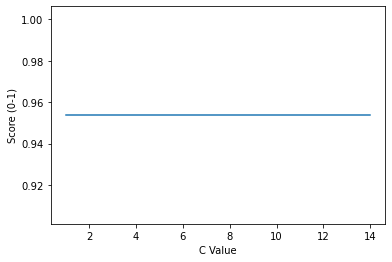

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
n_scores = np.zeros(14)

# testing c values for SVM fro m1-14 to determine which one produces the best model
for i in range(1,15):
    # set up the classifier
    svm = SVC(kernel = 'linear', C = i)    
    
    # fits the classifier to the training data, tests it on remaining data designated for test data.
    # It does this for each of the 10 regions of data when it is spit into 10 equal parts.
    svm_scores = cross_val_score(svm, ml_df, ml_target, cv = 10)
        
    n_scores[i-1] = np.mean(svm_scores)

plt.plot(range(1,15), n_scores)
plt.xlabel("C Value")
plt.ylabel("Score (0-1)")
plt.show

In [48]:
# setting up the SVM classifier
# choosing the hyperparameter 1 because all of the sampled C values were the same
svm = SVC(kernel = 'linear', C = 1)

# fits the classifier to the training data, tests it on remaining data designated for test data.
# It does this for each of the 10 regions of data when it is spit into 10 equal parts.
svm_scores = cross_val_score(svm, ml_df, ml_target, cv = 10)

# printing the average score from the CV testing
print("Individual CV Scores: ", svm_scores)
print("\nCV Score: ", np.mean(svm_scores))

Individual CV Scores:  [0.95454545 0.95454545 0.95454545 0.95454545 0.95454545 0.95454545
 0.95075758 0.95075758 0.95437262 0.95437262]

CV Score:  0.9537533125936168


<function matplotlib.pyplot.show(close=None, block=None)>

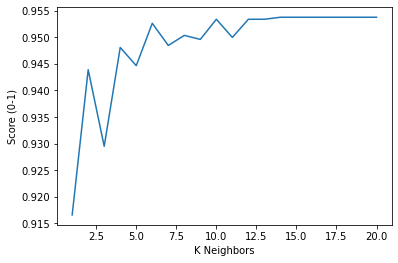

In [49]:
from sklearn.neighbors import KNeighborsClassifier


n_scores = np.zeros(20)

# testing k values for KNN from 1-14 to determine which one is the best model
for i in range(1,21):
    # set up the classifier
    knn = KNeighborsClassifier(n_neighbors = i)
    
    # fits the classifier to the training data, tests it on remaining data designated for test data.
    # It does this for each of the 10 regions of data when it is spit into 10 equal parts.
    knn_scores = cross_val_score(knn, ml_df, ml_target, cv = 10)
        
    n_scores[i-1] = np.mean(knn_scores)

plt.plot(range(1,21), n_scores)
plt.xlabel("K Neighbors")
plt.ylabel("Score (0-1)")
plt.show

In [50]:
# Based on the above graph, we can see that 14 is the highest value for k in this dataset.
# I will apply this as our model

# Create the 9-NN model
knn = KNeighborsClassifier(n_neighbors = 14)

# running 10 fold CV on the classifier
knn_scores = cross_val_score(knn, ml_df, ml_target, cv = 10)
print("Individual CV Scores: ", knn_scores)
print("\nCV Score: ", np.mean(knn_scores))


Individual CV Scores:  [0.95454545 0.95454545 0.95454545 0.95454545 0.95454545 0.95454545
 0.95075758 0.95075758 0.95437262 0.95437262]

CV Score:  0.9537533125936168


In [51]:
from scipy import stats

print("----- 10-FOLD CROSS VALIDATION STATISTICS -----")
print("\nLinear SVM: \nMean: ", np.mean(svm_scores), "\nStandard Deviation: ", np.std(svm_scores))
print("Standard Error: ", stats.sem(svm_scores))
print("\nk-Nearest Neighbors: \nMean: ", np.mean(knn_scores),"\nStandard Deviation: ", np.std(knn_scores))
print("Standard Error: ", stats.sem(knn_scores))



print("\n--------------- RELATED T-TESTS ---------------")
print("\nComparing k-NN with linear SVM: \nP-Value: ", stats.ttest_rel(svm_scores, knn_scores).pvalue)

----- 10-FOLD CROSS VALIDATION STATISTICS -----

Linear SVM: 
Mean:  0.9537533125936168 
Standard Deviation:  0.001499363324681466
Standard Error:  0.000499787774893822

k-Nearest Neighbors: 
Mean:  0.9537533125936168 
Standard Deviation:  0.001499363324681466
Standard Error:  0.000499787774893822

--------------- RELATED T-TESTS ---------------

Comparing k-NN with linear SVM: 
P-Value:  nan


NAN likely means a 0 pvalue. They are exactly the same model in every statistic so they should have a p-value of zero. Why it is specifically nan and not 0, we are not sure as the result for the t-test p-value is clearly 0 based on the two models.

# Conclusion

In conclusion, we have learned that there has been an  undeniable increase in profanity in hip hop. 

Through our analysis of the prevalence of profanity in popular hip-hop and rap songs, we
have analyzed various trends with multiple factors through data curation, parsing and
management. We also performed exploratory data analysis and applied hypothesis testing in
conjunction with machine learning to discover trends, correlations and outliers in the data and
form subsequent conclusions regarding profanity in hip-hop.

Our findings show that hip-hop and rap music has become undeniably more vulgar over
time and the frequency of profane language in popular rap music has steadily increased. In one
of our linear regression plots, we can identify the curve in the graph entitled ‘Swears Used Per
Song vs Year’, where the average value depicting the average swears used per song
represented by the slope almost doubles from 1985 to 2018.

The increase in frequency of profane lyrics in hip-hop/rap can be attributed to an
increase in exposure to profane rap music that correlates with its popularity. In other words, due
to rap music rising in popularity and therefore being heard by more of the general population,
more people are exposed to profanity and it gradually becomes the norm. As a result, it is no
longer uncommon to hear profanity in popular rap lyrics, so an increase over time results as
musicians continue to push that norm within the music industry.